# Mini Projeto com SVM

## <font color='red'>Usando SVM para prever a Intenção de Compra de Usuários de E-Comerce</font>

<font color='red'>Problema de Negócio</font>

Avaliar quais atributos influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar previsões de compras futuras


Conjunto de dados possui 12.330 sessões, cada sessão pertence a um usuário diferente no intervalo de 1 ano

Atributo 'Revenue' será o rótulo da classe 

In [1]:
# Imports 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv("C:/formacao_dataScience_DSA_DADOS/04_machineLearning/Cap11_SVM/dados/online_shoppers_intention.csv")

In [3]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


DDicionário de Dados:

"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra. 

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão. 

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página. 

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

In [4]:
df_original.shape

(12330, 18)

In [5]:
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Verificando valores missing
df_original.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [8]:
# Removendo linhas com valores missing
df_original.dropna(inplace = True)

In [9]:
df_original.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
df_original.shape

(12316, 18)

In [11]:
# Valores únicos por coluna
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [12]:
# Prepara dados para o plot

# Cria cópia do dataset original
df = df_original.copy()

# Listas vazias para os resultados 
continous = []
categorical = []

# Loop pelas colunas para separar colunas categoricas de continuas (decisão de tratar categorica como -30 valores unicos)
for c in df.columns[:-1]:
 if df.nunique()[c] >= 30:
  continous.append(c)
 else:
  categorical.append(c)

In [13]:
continous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [14]:
# Cariáveis Contínuas
df[continous].sample(5)

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
12250,41.125,0.0,126.0,4310.004668,0.000688,0.012823,3.451072
4412,194.000,0.0,21.0,304.275000,0.000000,0.001170,0.000000
6867,0.000,0.0,2.0,64.400000,0.000000,0.100000,0.000000
2072,0.000,0.0,27.0,694.303571,0.000000,0.007692,11.992640
11770,48.500,0.0,35.0,668.100000,0.007843,0.019118,36.955006


In [15]:
# Gráfico para variáveis numéricas 

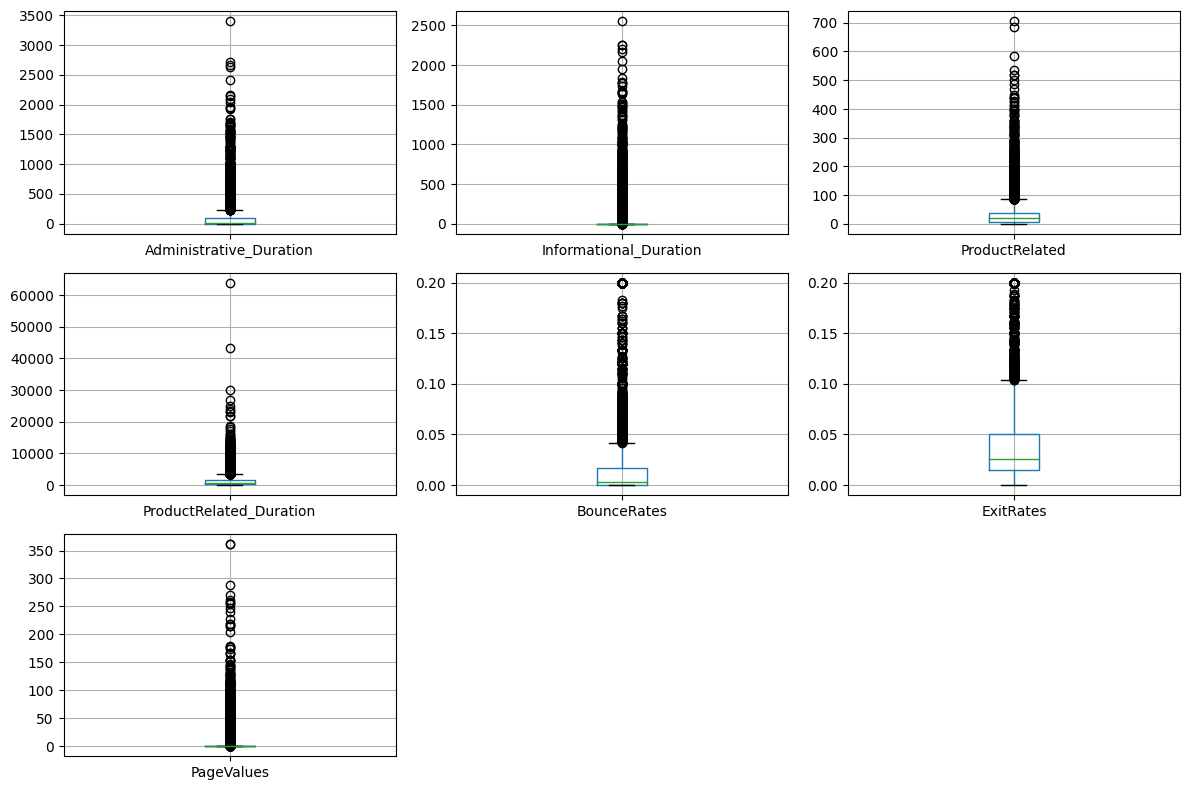

In [17]:
# Plot das variáveis contínuas 

# tamanho da área de plotagem 
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas 
for i, col in enumerate(continous):
 plt.subplot(3, 3, i + 1);
 df.boxplot(col)
 plt.tight_layout()

Variáveis numéricas estão distorcidas. vamos aplicar transformação de log para melhor visualização

In [18]:
# Transformação de lof nas variáveis contínuas
df[continous] = np.log1p(1 + df[continous])

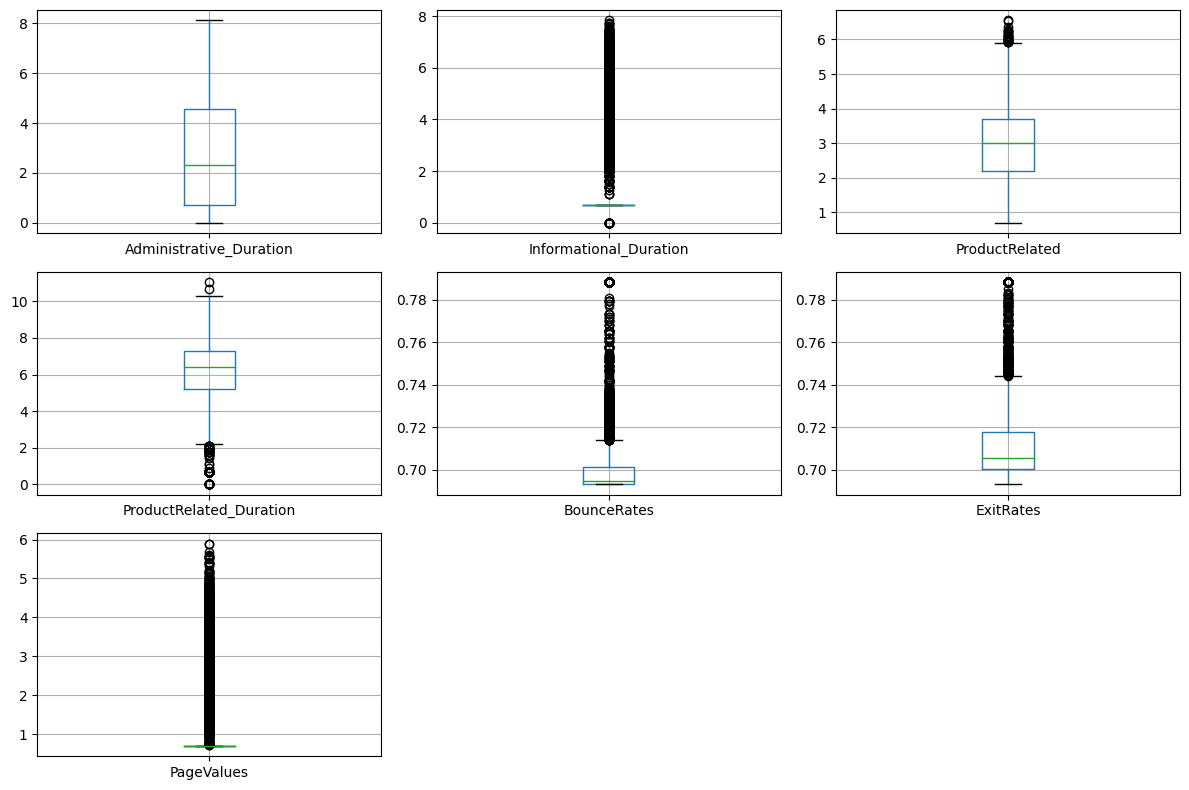

In [19]:
# Plot das variáveis contínuas 

# tamanho da área de plotagem 
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas 
for i, col in enumerate(continous):
 plt.subplot(3, 3, i + 1);
 df.boxplot(col)
 plt.tight_layout()

Essa abordagem com log, é apenas uma opção para melhor visualizar a distribuição dos dados

Agora iremos avaliar a matriz de correlação entre as variáveis contínuas

<Axes: >

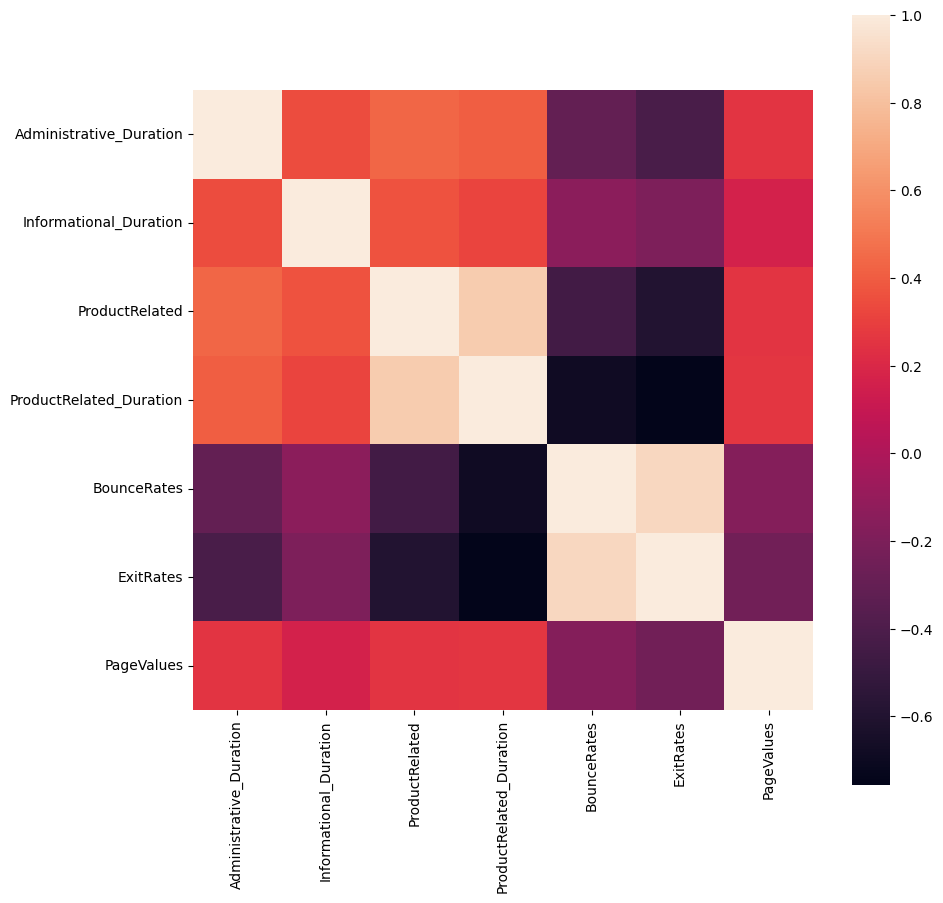

In [20]:
# Área de plotagem 
plt.figure(figsize= (10,10))

# Matriz de Correlação 
sns.heatmap(df[['Administrative_Duration',
                 'Informational_Duration',
                 'ProductRelated',
                 'ProductRelated_Duration',
                 'BounceRates',
                 'ExitRates',
                 'PageValues']].corr(), vmax = 1., square= True)

In [21]:
df[continous].corr()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative_Duration,1.000000,0.345605,0.432609,0.407685,-0.305397,-0.420271,0.255630
Informational_Duration,0.345605,1.000000,0.364004,0.315632,-0.142099,-0.201093,0.164913
ProductRelated,0.432609,0.364004,1.000000,0.854961,-0.454414,-0.592504,0.253575
ProductRelated_Duration,0.407685,0.315632,0.854961,1.000000,-0.681921,-0.757042,0.263174
BounceRates,-0.305397,-0.142099,-0.454414,-0.681921,1.000000,0.910124,-0.171327
ExitRates,-0.420271,-0.201093,-0.592504,-0.757042,0.910124,1.000000,-0.246179
PageValues,0.255630,0.164913,0.253575,0.263174,-0.171327,-0.246179,1.000000


### <font color="green">Visualização das Variáveis categóricas 

<Axes: title={'center': 'Venda ou Não'}, xlabel='Revenue', ylabel='count'>

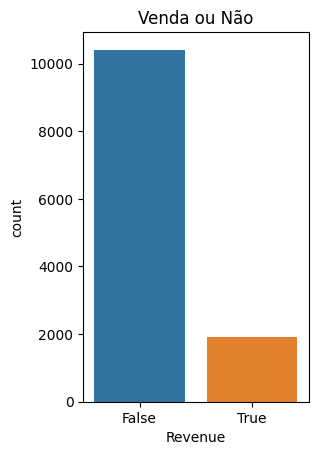

In [22]:
# Countplot Venda ou Não
plt.subplot(1,2,2)
plt.title("Venda ou Não")
sns.countplot(x='Revenue', data=df)

In [23]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

<Axes: xlabel='VisitorType', ylabel='count'>

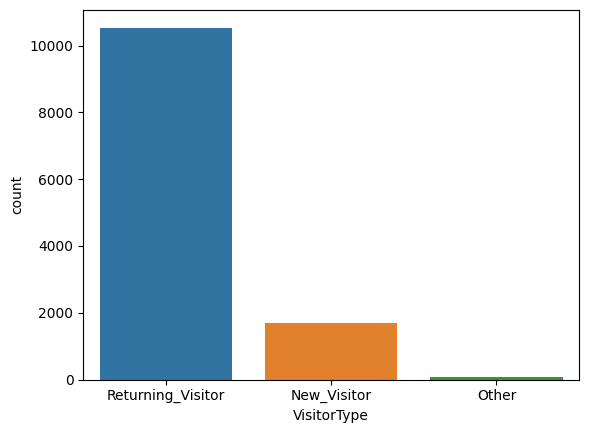

In [24]:
#Tipo de visitante

plt.xlabel("Tipo de Visitante")
sns.countplot(x='VisitorType', data=df)

<Axes: xlabel='VisitorType'>

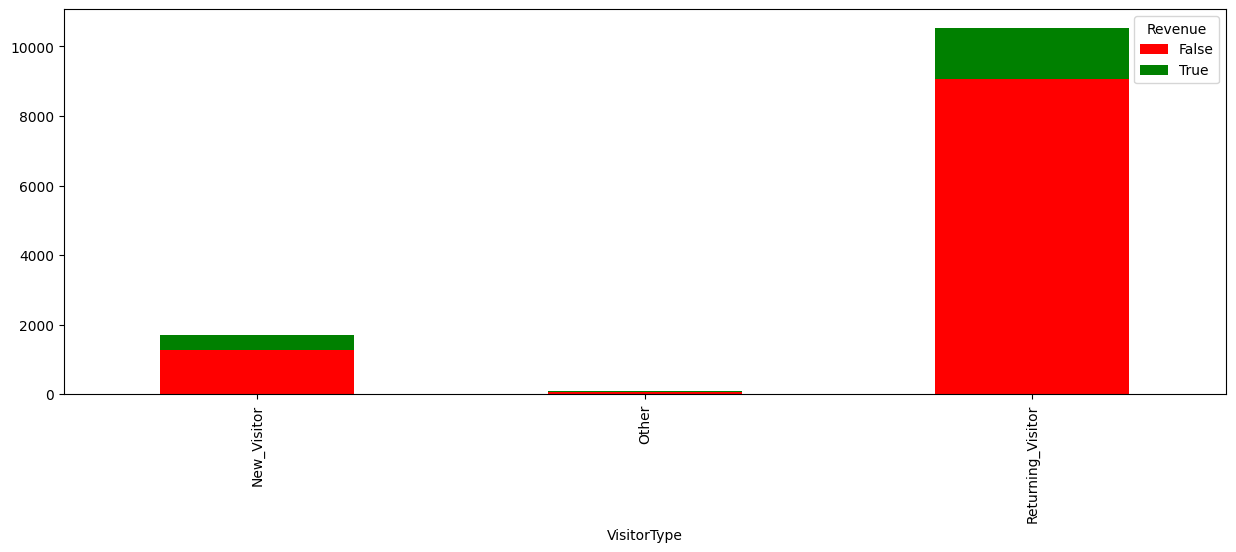

In [25]:
# Stacked Bar Tipo de Visitantes x Revenue
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind='bar',
                                                   stacked= True,
                                                   figsize= (15,5),
                                                   color = ['red', 'green'])

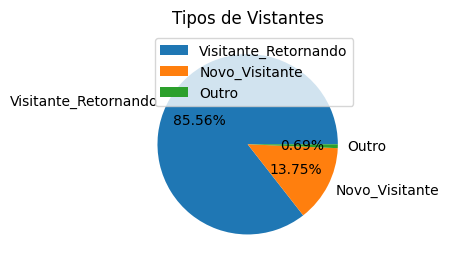

In [26]:
# Pie Chart Tipo de visitantes
labels = ["Visitante_Retornando", "Novo_Visitante", "Outro"]
plt.subplot(1,2,1)
plt.title("Tipos de Vistantes")
plt.pie(df["VisitorType"].value_counts(), labels = labels, autopct = "%.2f%%")
plt.legend()

<Axes: title={'center': 'Final de Semana ou Não'}, xlabel='Weekend', ylabel='count'>

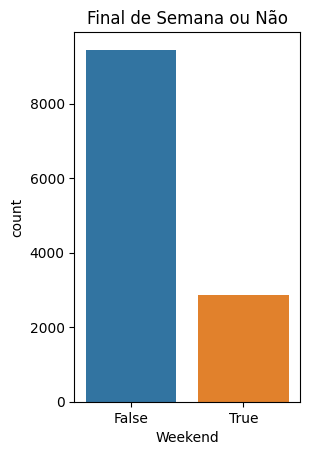

In [27]:
# Countplot Venda ou Não
plt.subplot(1,2,1)
plt.title("Final de Semana ou Não")
sns.countplot(x='Weekend', data=df)

<Axes: xlabel='Weekend'>

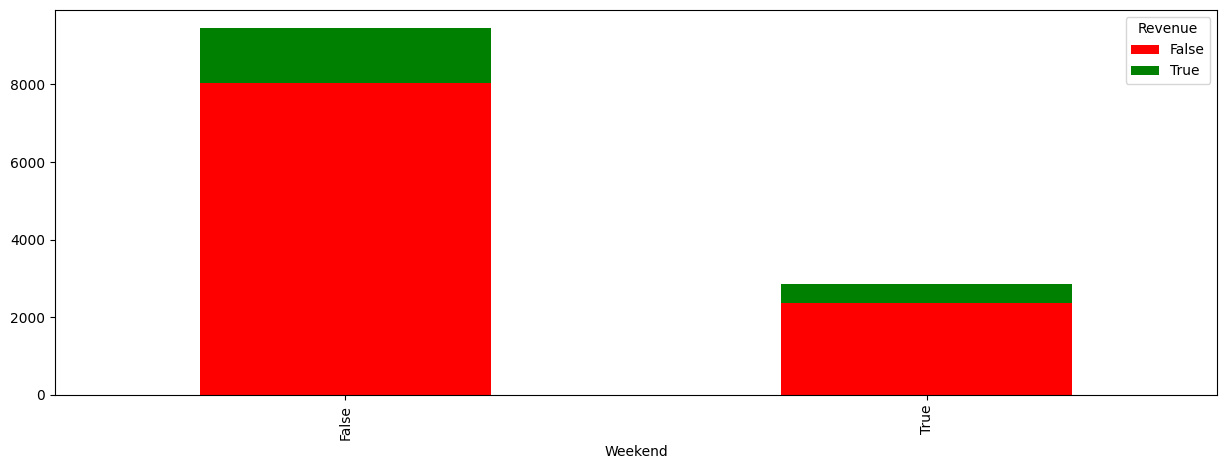

In [28]:
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind='bar',
                                                   stacked= True,
                                                   figsize= (15,5),
                                                   color = ['red', 'green'])

<Axes: title={'center': 'Tipos de Sistemas Operacionais'}, xlabel='OperatingSystems', ylabel='count'>

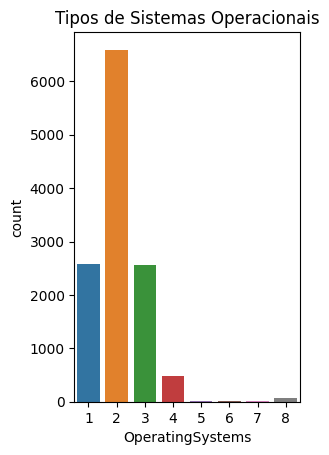

In [29]:
# Countplot Venda ou Não
plt.subplot(1,2,1)
plt.title("Tipos de Sistemas Operacionais")
sns.countplot(x='OperatingSystems', data=df)

<Axes: xlabel='OperatingSystems'>

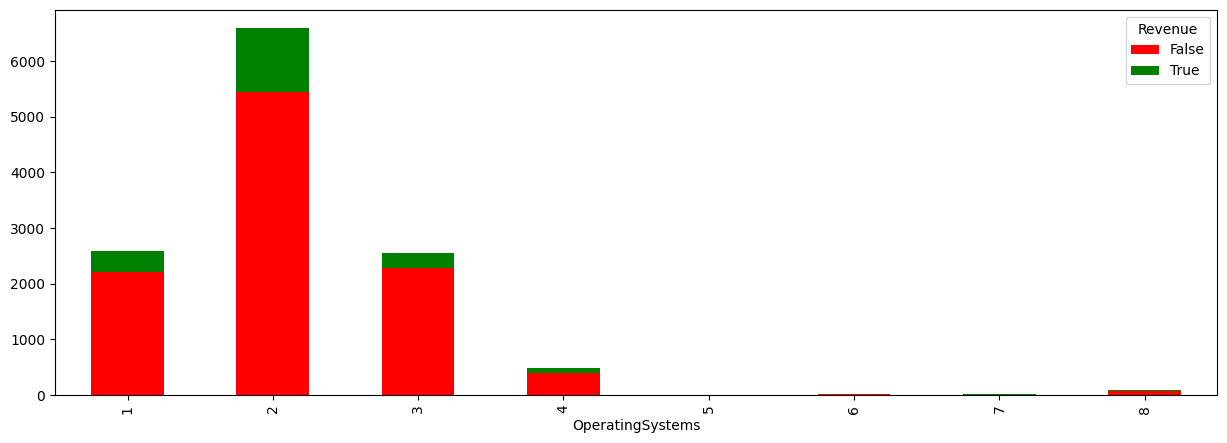

In [30]:
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind='bar',
                                                   stacked= True,
                                                   figsize= (15,5),
                                                   color = ['red', 'green'])

<Axes: title={'center': 'Tipos de Sistemas Operacionais'}, xlabel='TrafficType', ylabel='count'>

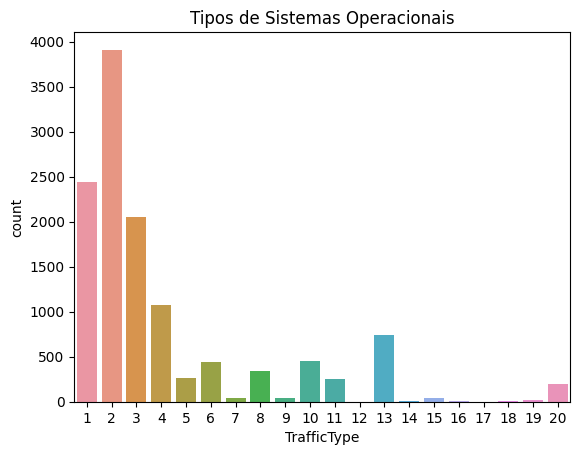

In [31]:
# Countplot tipo de gráfico

plt.title("Tipos de Sistemas Operacionais")
sns.countplot(x='TrafficType', data=df)

<Axes: xlabel='TrafficType'>

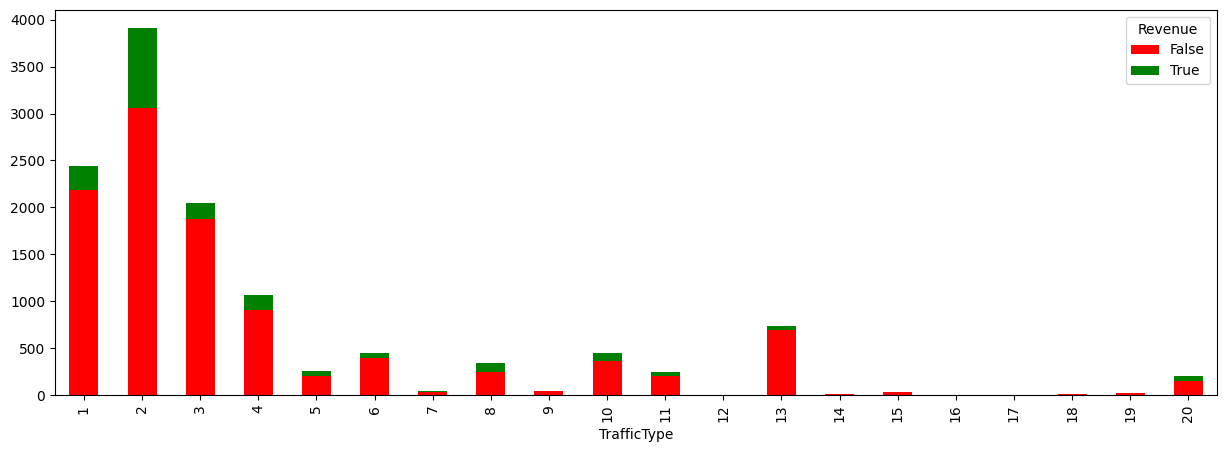

In [32]:
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind='bar',
                                                   stacked= True,
                                                   figsize= (15,5),
                                                   color = ['red', 'green'])

## <font color="green"> Pré Processamento dos Dados</font>


In [33]:
df_original.sample(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9547,0.0,0.0,0.0,0.0,4.0,90.5,0.10000,0.166667,0.0,0.0,Nov,3,2,1,10,Returning_Visitor,False,False
4482,1.0,0.0,0.0,0.0,31.0,1282.0,0.03125,0.050000,0.0,0.8,May,2,2,6,3,Returning_Visitor,False,False
3547,0.0,0.0,0.0,0.0,7.0,855.0,0.00000,0.028571,0.0,0.0,May,2,2,1,1,Returning_Visitor,False,False


In [34]:
# Cria o Encoder
lb = LabelEncoder()

In [35]:
# Aplica o encoder nas variáveis que estão com string 
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

In [36]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [37]:
# Verificando se a variável resposta está balanceada
target_count = df_original.Revenue.value_counts()
target_count

Revenue
False    10408
True      1908
Name: count, dtype: int64

Text(0.5, 1.0, 'Contagem das Classes\n')

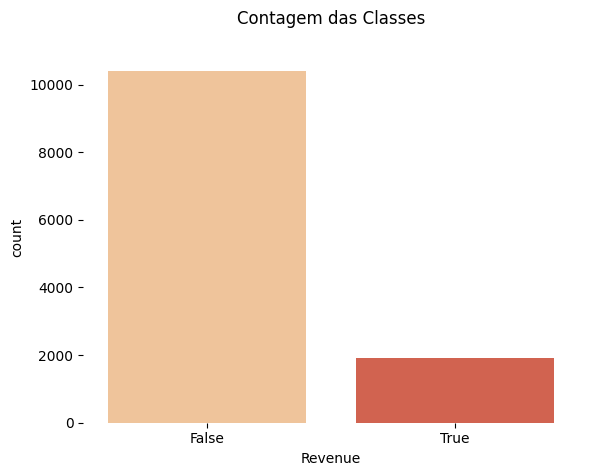

In [38]:
# Plot
sns.countplot(x='Revenue', data=df_original, palette= "OrRd")
plt.box(False)
plt.title("Contagem das Classes\n")

In [39]:
# Instalação e Importação do pacote imblearn
!pip install -q imblearn
import imblearn

In [40]:
# Shape 
df_original.shape

(12316, 18)

In [41]:
# Variáveis preditoras
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [42]:
# Variáveis target
df_original.iloc[:,17].head()


0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Balanceamento de Classe - Oversampling

In [43]:
# Importa a função
from imblearn.over_sampling import SMOTE

seed = 100

# Separa X e y
X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

In [44]:
y_res.value_counts()

Revenue
False    10408
True     10408
Name: count, dtype: int64

In [45]:
X_res.shape

(20816, 17)

In [46]:
y_res.shape

(20816,)

In [47]:
# Ajustando X e y
X = X_res
y = y_res

In [48]:
# Divisão em Dados de Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = 42)

<font color = "red">------------------------------------</font>

# <font color = "red">Modelo SVM</font>

### <font color = "red">Modelo Base com Kernel Linear</font>

In [123]:
# Modelo V1 
modelo_v1 = svm.SVC(kernel= "linear")
# SVC - Support Vector Classifier

In [51]:
import time

In [ ]:
# Treinamento do primeiro modelo (Sem otimizações e padronização)
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print(f"Tempo de treinamento do Modelo_v1: {end - start}")

In [ ]:
# Previsões 
previsoes_v1 = modelo_v1.predict(X_teste)

In [ ]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {
 "Modelo": "SVM",
 "Versão": "1",
 "Kernel": "Linear",
 "Precision": precision_score(previsoes_v1, y_teste),
 "Recall": recall_score(previsoes_v1, y_teste),
 "F1_Score": f1_score(previsoes_v1, y_teste),
 "Acurácia": accuracy_score(previsoes_v1, y_teste),
 "AUC": roc_auc_score(y_teste, previsoes_v1) #AUC inverte a ordem dos dados -  primeiro real depois previsões
}

In [ ]:
print("Métricas em Testes:\n")
SVM_dict_v1

<font color = "red">------------------------------------</font>

### <font color = "red">Modelo com Kernel Linear e Dados Padronizados (Scaled)</font>

In [49]:
# Padronização
X_treino_scaled = StandardScaler().fit_transform(X_treino)
X_teste_scaled = StandardScaler().fit_transform(X_teste)

In [50]:
# Modelo v2
modelo_v2 = svm.SVC(kernel="linear")

In [53]:
# TREINAMENTO
start = time.time()
modelo_v2.fit(X_treino_scaled, y_treino) # y é booleano, por isso n precisa de padronização
end = time.time()
print(f"Tempo de treinamento do Modelo_v2: {round(end - start,2)} segundos")

Tempo de treinamento do Modelo_v2: 10.74 segundos


In [54]:
# Previsões 
previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [77]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {
 "Modelo": "SVM",
 "Versão": "2",
 "Kernel": "Linear com dados Padronizados",
 "Precision": precision_score(previsoes_v2, y_teste),
 "Recall": recall_score(previsoes_v2, y_teste),
 "F1_Score": f1_score(previsoes_v2, y_teste),
 "Acurácia": accuracy_score(previsoes_v2, y_teste),
 "AUC": roc_auc_score(y_teste, previsoes_v2) #AUC inverte a ordem dos dados -  primeiro real depois previsões
}

In [78]:
print("Métricas em Teste do Modelo V2:\n")
SVM_dict_v2

Métricas em Teste do Modelo V2:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear com dados Padronizados',
 'Precision': 0.7867553865652726,
 'Recall': 0.8912419239052405,
 'F1_Score': 0.8357455402221474,
 'Acurácia': 0.843714971977582,
 'AUC': 0.8443326949012832}

<font color = "red">------------------------------------</font>

### <font color = "red">Otimização de Hiperparâmetros com Grid Search e Kernel RBF</font>

In [58]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = "rbf")

In [60]:
# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001, 3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3) # cv = validações cruzadas

# Treinamento
modelo_v3_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print(f"Tempo de treinamento do Modelo_v3 com GridSearch RBF: {round(end - start,2)} segundos")

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_rbf.best_params_}")


Tempo de treinamento do Modelo_v3 com GridSearch RBF: 198.93 segundos
Acurácia em Treinamento: 87.41%

Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


In [61]:
# Previsões 
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [83]:
# Dicionário de métricas e metadados
SVM_dict_v3 = {
 "Modelo": "SVM",
 "Versão": "3",
 "Kernel": "RBF com dados padronizados",
 "Precision": precision_score(previsoes_v3, y_teste),
 "Recall": recall_score(previsoes_v3, y_teste),
 "F1_Score": f1_score(previsoes_v3, y_teste),
 "Acurácia": accuracy_score(previsoes_v3, y_teste),
 "AUC": roc_auc_score(y_teste, previsoes_v3) #AUC inverte a ordem dos dados -  primeiro real depois previsões
}

In [84]:
print("Métricas em Teste do Modelo V3:\n")
SVM_dict_v3

Métricas em Teste do Modelo V3:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF com dados padronizados',
 'Precision': 0.8368187579214195,
 'Recall': 0.8986049676760803,
 'F1_Score': 0.8666119770303528,
 'Acurácia': 0.8698158526821457,
 'AUC': 0.8701737039849895}

<font color = "red">------------------------------------</font>

### <font color = "red">Otimização de Hiperparâmetros com Grid Search e Kernel Polinomial</font>

In [64]:
# Cria o modelo 
modelo_v4 = svm.SVC(kernel= 'poly')

In [65]:
# Valores para o grid
r_range = np.array([0.5, 1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2,3,4])


# Grid de Hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, 
                       degree = d_range, 
                       coef0 = r_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Treinamento 
modelo_v4_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print(f"Tempo de treinamento do Modelo_v4 com GridSearch Polinomial Kernel: {round(end - start,2)} segundos")

print(f"Acurácia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v4_grid_search_poly.best_params_}")

Tempo de treinamento do Modelo_v4 com GridSearch Polinomial Kernel: 135.9 segundos
Acurácia em Treinamento: 86.14%

Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [67]:
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [81]:
SVM_dict_v4 = {
 "Modelo": "SVM",
 "Versão": "4",
 "Kernel": "Polinomial com Dados Padronizados",
 "Precision": precision_score(previsoes_v4, y_teste),
 "Recall": recall_score(previsoes_v4, y_teste),
 "F1_Score": f1_score(previsoes_v4, y_teste),
 "Acurácia": accuracy_score(previsoes_v4, y_teste),
 "AUC": roc_auc_score(y_teste, previsoes_v4) #AUC inverte a ordem dos dados -  primeiro real depois previsões
}

In [82]:
print("Métricas em Teste do Modelo V4:\n")
SVM_dict_v4

Métricas em Teste do Modelo V4:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.80893536121673,
 'Recall': 0.8932820153953814,
 'F1_Score': 0.8490189557698703,
 'Acurácia': 0.8546036829463571,
 'AUC': 0.8550989528647587}

<font color = "gree">Concatenando todos os dicionários em um DF - para avaliação

In [85]:
resumo = pd.DataFrame({"SVM_dict_v2": pd.Series(SVM_dict_v2),
                       "SVM_dict_v3": pd.Series(SVM_dict_v3),
                       "SVM_dict_v4": pd.Series(SVM_dict_v4)})

In [86]:
resumo

,SVM_dict_v2,SVM_dict_v3,SVM_dict_v4
Modelo,SVM,SVM,SVM
Versão,2,3,4
Kernel,Linear com dados Padronizados,RBF com dados padronizados,Polinomial com Dados Padronizados
Precision,0.786755,0.836819,0.808935
Recall,0.891242,0.898605,0.893282
F1_Score,0.835746,0.866612,0.849019
Acurácia,0.843715,0.869816,0.854604
AUC,0.844333,0.870174,0.855099


## <font color = "gree">Fazendo Previsões com o Modelo Treinado

In [87]:
# Novo registro
novo_x = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 0.69, 0.70, 0.69, 0,6,1,1,3,3,2,False]).reshape(1, -1)

In [88]:
# Padronizando o registro
novo_x_scaled = StandardScaler().fit_transform(novo_x)

In [89]:
# Previsõres 
previsao_novo_x = modelo_v3_grid_search_rbf.predict(novo_x_scaled)

In [90]:
previsao_novo_x

array([ True])